In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pumpkins = pd.read_csv('US_pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [48]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [49]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

In [50]:
df = {
    'City Name' : pumpkins['City Name'],
    'Package' : pumpkins['Package'],
    'Month' : month,
    'Low Price' : pumpkins['Low Price'],
    'High Price' : pumpkins['High Price'],
    'Price' : price 
}
new_pumpkins = pd.DataFrame(df)
new_pumpkins

,City Name,Package,Month,Low Price,High Price,Price
70,BALTIMORE,1 1/9 bushel cartons,9,15.00,15.0,15.000
71,BALTIMORE,1 1/9 bushel cartons,9,18.00,18.0,18.000
72,BALTIMORE,1 1/9 bushel cartons,10,18.00,18.0,18.000
73,BALTIMORE,1 1/9 bushel cartons,10,17.00,17.0,17.000
74,BALTIMORE,1 1/9 bushel cartons,10,15.00,15.0,15.000
...,...,...,...,...,...,...
1738,ST. LOUIS,1/2 bushel cartons,9,15.00,15.0,15.000
1739,ST. LOUIS,1/2 bushel cartons,9,13.75,15.0,14.375
1740,ST. LOUIS,1/2 bushel cartons,9,10.75,15.0,12.875
1741,ST. LOUIS,1/2 bushel cartons,9,12.00,12.0,12.000


In [51]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'price'] = price/(1/2)

new_pumpkins

,City Name,Package,Month,Low Price,High Price,Price,price
70,BALTIMORE,1 1/9 bushel cartons,9,15.00,15.0,13.500,NaN
71,BALTIMORE,1 1/9 bushel cartons,9,18.00,18.0,16.200,NaN
72,BALTIMORE,1 1/9 bushel cartons,10,18.00,18.0,16.200,NaN
73,BALTIMORE,1 1/9 bushel cartons,10,17.00,17.0,15.300,NaN
74,BALTIMORE,1 1/9 bushel cartons,10,15.00,15.0,13.500,NaN
...,...,...,...,...,...,...,...
1738,ST. LOUIS,1/2 bushel cartons,9,15.00,15.0,15.000,30.00
1739,ST. LOUIS,1/2 bushel cartons,9,13.75,15.0,14.375,28.75
1740,ST. LOUIS,1/2 bushel cartons,9,10.75,15.0,12.875,25.75
1741,ST. LOUIS,1/2 bushel cartons,9,12.00,12.0,12.000,24.00


In [52]:
price = new_pumpkins['Price']
month = new_pumpkins['Month']
city = new_pumpkins['City Name']
package = new_pumpkins['Package']
low_p = new_pumpkins['Low Price']
high_p = new_pumpkins['High Price']

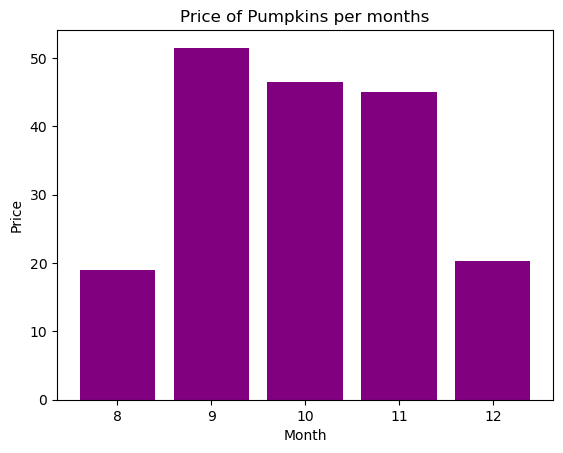

In [53]:
plt.bar(month, price, color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Pumpkins per months')

plt.show()

/home/khalboy10/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


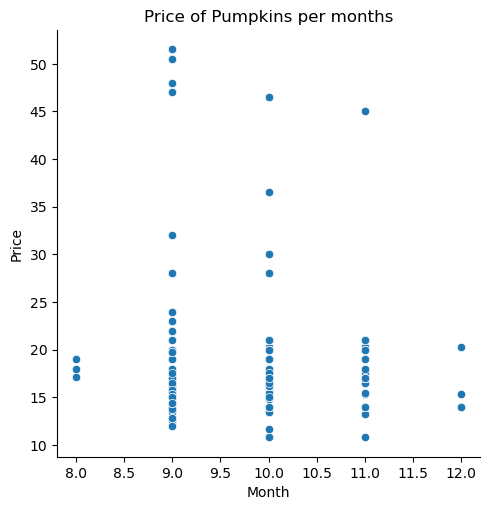

In [54]:
sns.relplot(month, price)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Pumpkins per months')

plt.show()

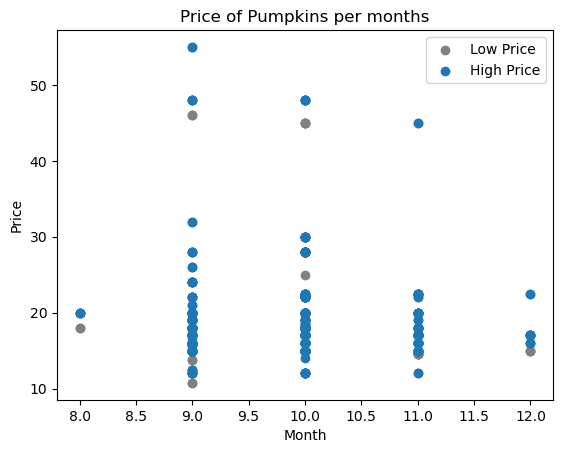

In [55]:
plt.scatter(month, low_p, label='Low Price', color='gray')
plt.scatter(month, high_p, label='High Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Pumpkins per months')

plt.legend()
plt.show()

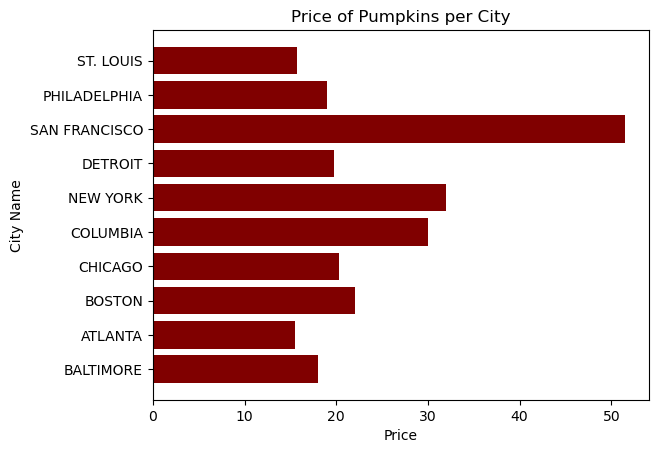

In [56]:
plt.barh(city, price, color='maroon')
plt.xlabel('Price')
plt.ylabel('City Name')
plt.title('Price of Pumpkins per City')

plt.show()